# Data Cleaning/Preprocessing

In [3]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#Verify if the dataset is encoded as UTF-8 format
import chardet

# Read the file as bytes
with open("C:/Users/lilia/OneDrive/Desktop/lilianapgarciac/LILIANA GARCÍA/2024/MMA - Canada Dream/MMA/MGSC661/supply_chain_analytics/Dataset/Dataset/DataCoSupplyChainDataset.csv", "rb") as f:
    result = chardet.detect(f.read(10000))

#Show the encoding
print(result)


{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


**Notes:** The file is encoded as 'ISO-8859-1'. Therefore we need to specify the encoding when loading the dataset. 

In [5]:
#Load Dataset
data = pd.read_csv("C:/Users/lilia/OneDrive/Desktop/lilianapgarciac/LILIANA GARCÍA/2024/MMA - Canada Dream/MMA/MGSC661/supply_chain_analytics/Dataset/Dataset/DataCoSupplyChainDataset.csv", encoding="ISO-8859-1")

In [6]:
#Verify the first five rows of the dataset
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [7]:
#Verify the data structure for correct data types and missing values.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

**Notes:** As we can observe, there is a row ('Product Description') with '0' entries, we will proceed to confirm for other missing values and remove it.

In [8]:
#Check for missing values
data.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [9]:
#Remove 'Product Description' column (all values missing)
data = data.drop(columns=["Product Description"])

#Remove 'Order Zipcode' column (high missing values)
data = data.drop(columns=["Order Zipcode"])

#Verify if the rest of the missing values are significant
data.isnull().sum()

Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Delivery Status                  0
Late_delivery_risk               0
Category Id                      0
Category Name                    0
Customer City                    0
Customer Country                 0
Customer Email                   0
Customer Fname                   0
Customer Id                      0
Customer Lname                   8
Customer Password                0
Customer Segment                 0
Customer State                   0
Customer Street                  0
Customer Zipcode                 3
Department Id                    0
Department Name                  0
Latitude                         0
Longitude                        0
Market                           0
Order City                       0
Order Country                    0
Order Customer Id                0
order date (DateOrde

In [10]:
#Remove columns that are not necessary for the model

#Customer First Name
data = data.drop(columns=["Customer Fname"])

#Customer Last Name
data = data.drop(columns=["Customer Lname"])

#Customer Email
data = data.drop(columns=["Customer Email"])

#Customer Password
data = data.drop(columns=["Customer Password"])

#Product Image
data = data.drop(columns=["Product Image"])

#Visualize the first 5 rows of the dataset
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,Southeast Asia,Java Occidental,COMPLETE,1360,73,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,South Asia,Rajastán,PENDING,1360,73,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,South Asia,Rajastán,CLOSED,1360,73,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,Oceania,Queensland,COMPLETE,1360,73,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,Oceania,Queensland,PENDING_PAYMENT,1360,73,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [11]:
#Remove ID columns

#Category ID
data = data.drop(columns=["Category Id"])

#Customer ID
data = data.drop(columns=["Customer Id"])

#Department ID
data = data.drop(columns=["Department Id"])

#Order ID
data = data.drop(columns=["Order Id"])

#Order Customer ID
data = data.drop(columns=["Order Customer Id"])

#Order Item ID
data = data.drop(columns=["Order Item Id"])

#Order Item Cardprod ID
data = data.drop(columns=["Order Item Cardprod Id"])

#Product Card ID
data = data.drop(columns=["Product Card Id"])

#Product Category ID
data = data.drop(columns=["Product Category Id"])   

In [12]:
#Remove Zipcodes, longitudes, and latitudes - not relevant to our model
data = data.drop(columns=["Customer Zipcode", "Latitude", "Longitude"])


In [13]:
#Remove street information - not relevant to our model
data = data.drop(columns=["Customer Street"])

**Notes:** Since we have columns with date information but their data type is 'object', we need to convert it fo datetime data type. 

In [14]:
#Convert features that represent date and time to datetime data type
data['order_date'] = pd.to_datetime(data['order date (DateOrders)'])
data['shipping_date']=pd.to_datetime(data['shipping date (DateOrders)'])

#Handle the time and date variables (Separate them)
data['order_year'] = pd.DatetimeIndex(data['order_date']).year
data['order_month'] = pd.DatetimeIndex(data['order_date']).month
data['order_day'] = pd.DatetimeIndex(data['order_date']).day
data['shipping_year'] = pd.DatetimeIndex(data['shipping_date']).year
data['shipping_month'] = pd.DatetimeIndex(data['shipping_date']).month
data['shipping_day'] = pd.DatetimeIndex(data['shipping_date']).day

In [15]:
#Remove original 'object' type date features.
data = data.drop(columns=["order date (DateOrders)", "shipping date (DateOrders)"])

In [16]:
#Display first five rows of the full dataset
pd.set_option('display.max_columns', None)
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Department Name,Market,Order City,Order Country,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Name,Product Price,Product Status,Shipping Mode,order_date,shipping_date,order_year,order_month,order_day,shipping_year,shipping_month,shipping_day
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,Fitness,Pacific Asia,Bekasi,Indonesia,13.110000,0.04,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,Smart watch,327.75,0,Standard Class,2018-01-31 22:56:00,2018-02-03 22:56:00,2018,1,31,2018,2,3
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,Fitness,Pacific Asia,Bikaner,India,16.389999,0.05,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,Smart watch,327.75,0,Standard Class,2018-01-13 12:27:00,2018-01-18 12:27:00,2018,1,13,2018,1,18
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,Sporting Goods,San Jose,EE. UU.,Consumer,CA,Fitness,Pacific Asia,Bikaner,India,18.030001,0.06,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,Smart watch,327.75,0,Standard Class,2018-01-13 12:06:00,2018-01-17 12:06:00,2018,1,13,2018,1,17
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,Sporting Goods,Los Angeles,EE. UU.,Home Office,CA,Fitness,Pacific Asia,Townsville,Australia,22.940001,0.07,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,Smart watch,327.75,0,Standard Class,2018-01-13 11:45:00,2018-01-16 11:45:00,2018,1,13,2018,1,16
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,Corporate,PR,Fitness,Pacific Asia,Townsville,Australia,29.500000,0.09,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,Smart watch,327.75,0,Standard Class,2018-01-13 11:24:00,2018-01-15 11:24:00,2018,1,13,2018,1,15


# EDA: General

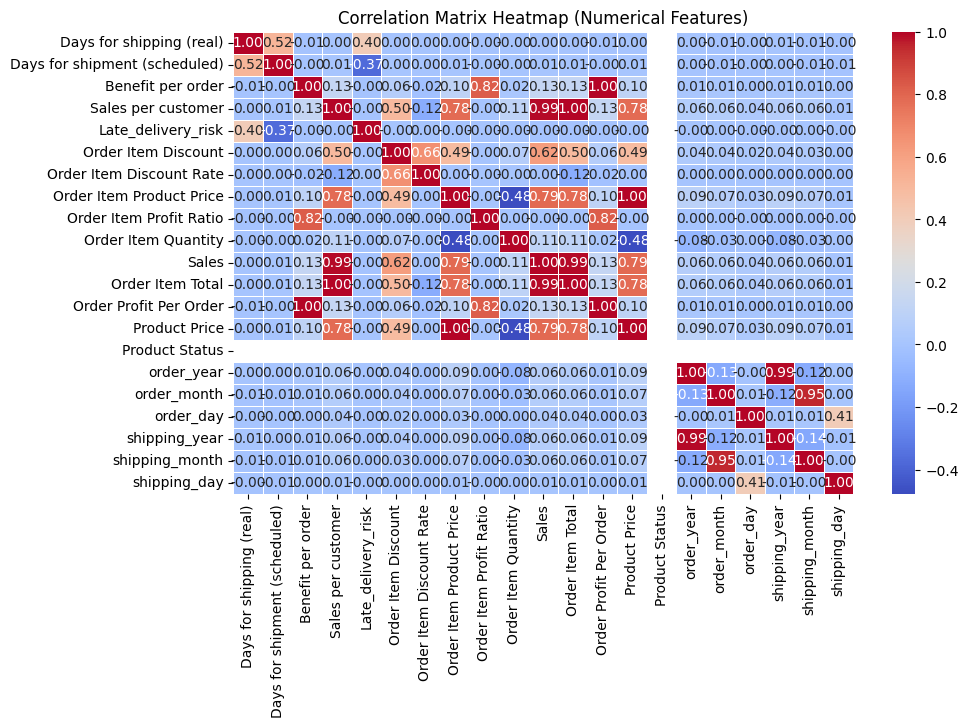

In [17]:
#Correlation Matrix for numerical features
num_data = data.select_dtypes(include=["number"])
correlation_matrix = num_data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap (Numerical Features)")
plt.show()

**Notes:** As we can observe in the correlation matrix, there is a problem that the 'Product Status' feature has no values. All inputs are '0'. Therefore, we proceed to remove it from the dataset. 

In [18]:
#Drop Product Status (all values are '0')
data = data.drop(columns=["Product Status"])

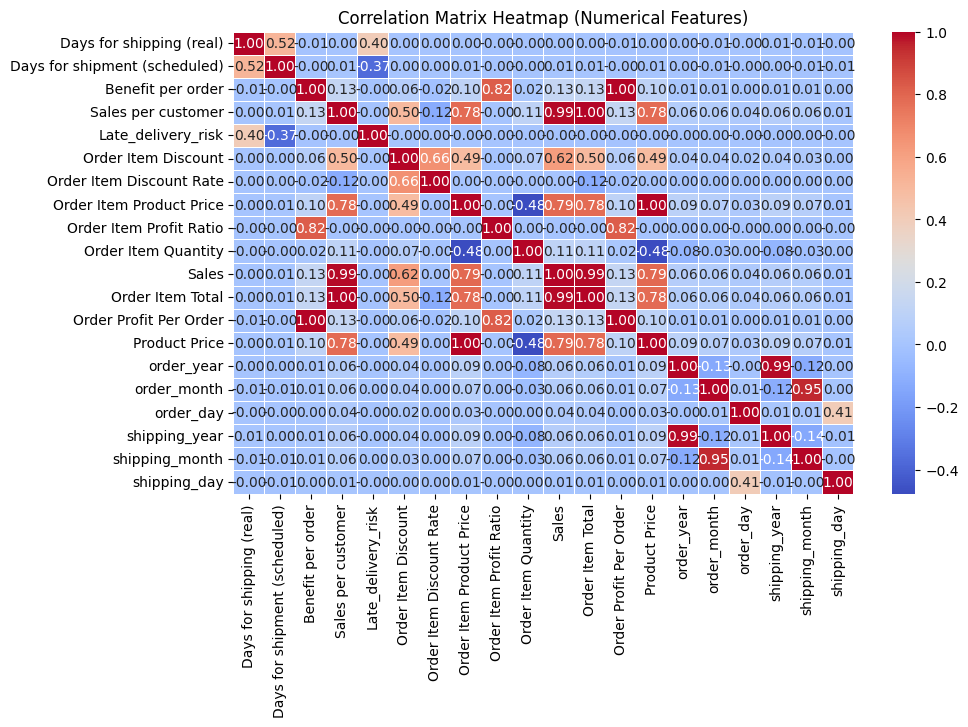

In [19]:
#Correlation Matrix for numerical features
num_data = data.select_dtypes(include=["number"])
correlation_matrix = num_data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap (Numerical Features)")
plt.show()

In [20]:
#Identify highly correlated features

#Correlation matrix using abs to consider both positive and negative correlations
correlation_matrix = num_data.corr().abs()

#Threshold
threshold = 0.8

#Extract feature pairs with high correlation
high_corr_features = set()

for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.columns:
        if col1 != col2 and correlation_matrix.loc[col1, col2] > threshold:
            high_corr_features.add(col1)
            high_corr_features.add(col2)

#Print the names of the highly correlated features
print("Highly correlated features:")
print(high_corr_features)


Highly correlated features:
{'Order Profit Per Order', 'Order Item Profit Ratio', 'Order Item Total', 'Benefit per order', 'shipping_year', 'order_month', 'Sales', 'order_year', 'Order Item Product Price', 'Product Price', 'shipping_month', 'Sales per customer'}


**Notes:** As we can observe from the correlation matrix and the list of the highly correlated features, there is high correlation between 'Product Price' and 'Order Item Product Price'. To avoid multicollinearity or redundancy in the data, we will remove the 'Order Item Product Price' column. 

Additionally, we are working with analyzing the causes of delay, where shipping information is prioritized when compared to the order information. In real life, we assume that the products are being ordered and shipped in the same year, unless it is ordered in the last week of the year, where it will shipped at the beginning of the following year. Therefore, to avoid multicollinearity, we will remove the 'order year' column. The same applies for month, we will remove the 'order month' column.

Moreover, the 'sales' and 'order item total' columns are correlated and both has the same values. Therefore, we will remove the 'sales' column. It also applies for 'sales per customer' and 'order item total'. Since we are not analyzing from the business side, we will remove the 'sales per customer' column. The same applies for 'order item profit ratio' and 'benefit per order', we will remove the 'benefit per order' column. 

In [21]:
#Remove 'Order Item Product Price' column
data = data.drop(columns=["Order Item Product Price"])

In [22]:
#Remove 'order Year', 'order Month' column
data = data.drop(columns=["order_year", "order_month"])

In [23]:
#Remove 'Sales' column
data = data.drop(columns=["Sales"])

In [24]:
#Remove 'Sales per customer' column
data = data.drop(columns=["Sales per customer"])

In [25]:
#Remove 'Benefit per order' column
data = data.drop(columns=["Benefit per order"])

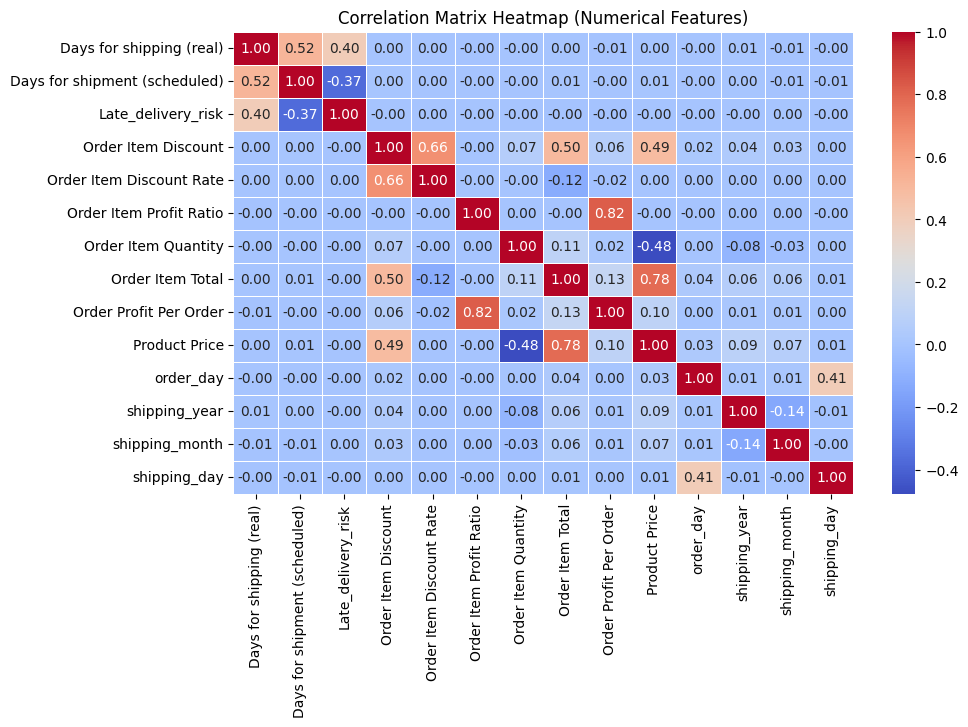

In [26]:
#Latest version of the Correlation Matrix for numerical features
num_data = data.select_dtypes(include=["number"])
correlation_matrix = num_data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap (Numerical Features)")
plt.show()

In [27]:
#Display first five rows of the full dataset
pd.set_option('display.max_columns', None)
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Department Name,Market,Order City,Order Country,Order Item Discount,Order Item Discount Rate,Order Item Profit Ratio,Order Item Quantity,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Name,Product Price,Shipping Mode,order_date,shipping_date,order_day,shipping_year,shipping_month,shipping_day
0,DEBIT,3,4,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,Fitness,Pacific Asia,Bekasi,Indonesia,13.110000,0.04,0.29,1,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,Smart watch,327.75,Standard Class,2018-01-31 22:56:00,2018-02-03 22:56:00,31,2018,2,3
1,TRANSFER,5,4,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,Fitness,Pacific Asia,Bikaner,India,16.389999,0.05,-0.80,1,311.359985,-249.089996,South Asia,Rajastán,PENDING,Smart watch,327.75,Standard Class,2018-01-13 12:27:00,2018-01-18 12:27:00,13,2018,1,18
2,CASH,4,4,Shipping on time,0,Sporting Goods,San Jose,EE. UU.,Consumer,CA,Fitness,Pacific Asia,Bikaner,India,18.030001,0.06,-0.80,1,309.720001,-247.779999,South Asia,Rajastán,CLOSED,Smart watch,327.75,Standard Class,2018-01-13 12:06:00,2018-01-17 12:06:00,13,2018,1,17
3,DEBIT,3,4,Advance shipping,0,Sporting Goods,Los Angeles,EE. UU.,Home Office,CA,Fitness,Pacific Asia,Townsville,Australia,22.940001,0.07,0.08,1,304.809998,22.860001,Oceania,Queensland,COMPLETE,Smart watch,327.75,Standard Class,2018-01-13 11:45:00,2018-01-16 11:45:00,13,2018,1,16
4,PAYMENT,2,4,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,Corporate,PR,Fitness,Pacific Asia,Townsville,Australia,29.500000,0.09,0.45,1,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,Smart watch,327.75,Standard Class,2018-01-13 11:24:00,2018-01-15 11:24:00,13,2018,1,15


**Notes:** The 'Days for shipping (real)' column shows the difference between shipping date and order date.

In [28]:
#Confirm that the target variable 'late_delivery_risk' has only 0 and 1 values
data['Late_delivery_risk'].value_counts()

Late_delivery_risk
1    98977
0    81542
Name: count, dtype: int64

**Notes:** We need to detect if the numerical features in the dataset contains any outliers. Therefore, we are using boxplots to visualize the distribution and identify outliers.

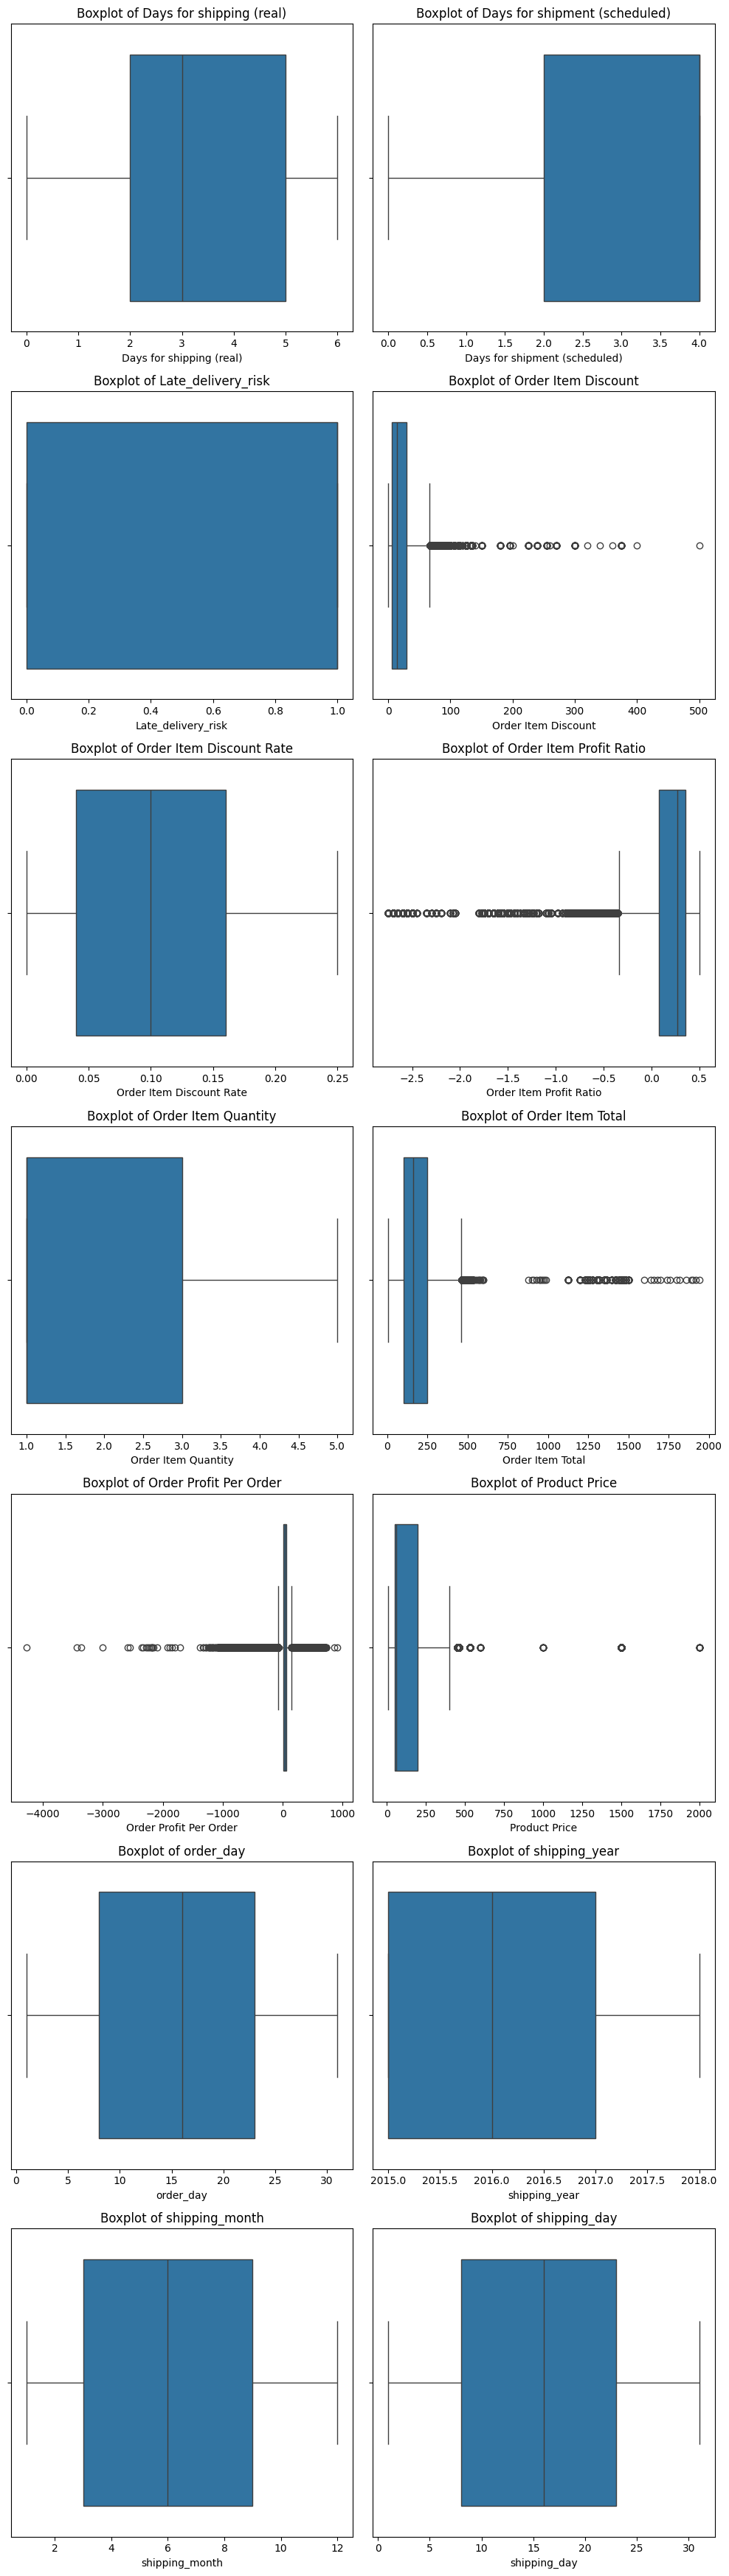

In [29]:
#Boxplot

#Set the number of columns for the subplot grid (2 columns)
n_cols = 2
n_rows = (len(num_data.columns) + n_cols - 1) // n_cols

#Create the subplot grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 5 * n_rows))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through the numerical columns and plot them
for i, column in enumerate(num_data.columns):
    sns.boxplot(data=num_data, x=column, ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')

# Remove any extra subplots if there are more axes than columns
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


**Notes:** There are many visible outliers for our some of the numerical features, but mainly for 'Order Profit per Order'. We will proceed to remove them.

In [30]:
#Create a copy of the dataframe to avoid modifying the original one
data_cleaned = data.copy()

#Loop through each numerical column to remove outliers
for column in num_data.columns:
    Q1 = data_cleaned[column].quantile(0.25)
    Q3 = data_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1  # Interquartile range

    #Define the lower and upper bounds for acceptable values
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    #Remove rows that have values outside the lower and upper bounds
    data_cleaned = data_cleaned[(data_cleaned[column] >= lower_bound) & (data_cleaned[column] <= upper_bound)]

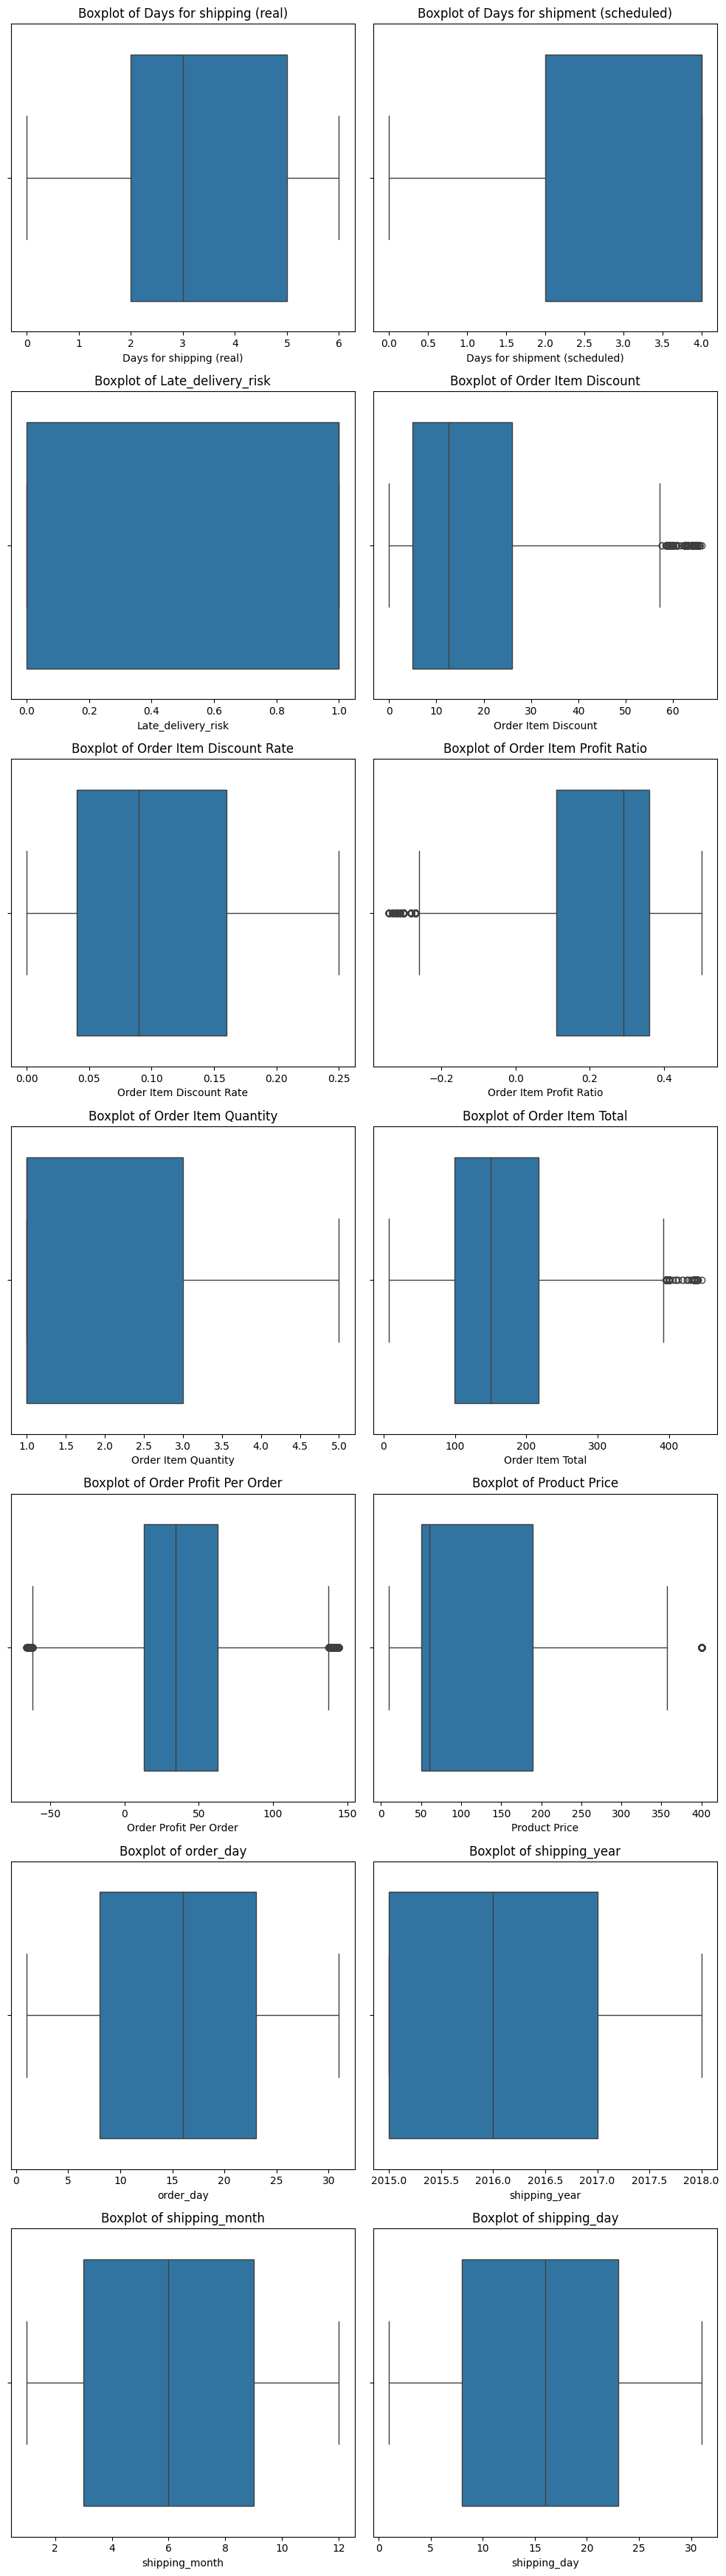

In [31]:
#Boxplots after removing the outliers

#Select only numerical columns
num_data_cleaned = data_cleaned.select_dtypes(include=["number"])

#Set the number of columns for the subplot grid (2 columns)
n_cols = 2
n_rows = (len(num_data_cleaned.columns) + n_cols - 1) // n_cols

#Create the subplot grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 5 * n_rows))

#Flatten the axes array for easy indexing
axes = axes.flatten()

#Loop through the numerical columns and plot them
for i, column in enumerate(num_data_cleaned.columns):
    sns.boxplot(data=num_data_cleaned, x=column, ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')

# Remove any extra subplots if there are more axes than columns
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Notes:** As we can observe from the visualizations, the majority of the outliers were removed. The boxplots looks reasonable and further outlier removal will be performed when the model performances are not meeting the expectations.

In [32]:
#Visualize first five rows of the cleaned dataset
data_cleaned.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Department Name,Market,Order City,Order Country,Order Item Discount,Order Item Discount Rate,Order Item Profit Ratio,Order Item Quantity,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Name,Product Price,Shipping Mode,order_date,shipping_date,order_day,shipping_year,shipping_month,shipping_day
0,DEBIT,3,4,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,Fitness,Pacific Asia,Bekasi,Indonesia,13.110000,0.04,0.29,1,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,Smart watch,327.75,Standard Class,2018-01-31 22:56:00,2018-02-03 22:56:00,31,2018,2,3
3,DEBIT,3,4,Advance shipping,0,Sporting Goods,Los Angeles,EE. UU.,Home Office,CA,Fitness,Pacific Asia,Townsville,Australia,22.940001,0.07,0.08,1,304.809998,22.860001,Oceania,Queensland,COMPLETE,Smart watch,327.75,Standard Class,2018-01-13 11:45:00,2018-01-16 11:45:00,13,2018,1,16
4,PAYMENT,2,4,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,Corporate,PR,Fitness,Pacific Asia,Townsville,Australia,29.500000,0.09,0.45,1,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,Smart watch,327.75,Standard Class,2018-01-13 11:24:00,2018-01-15 11:24:00,13,2018,1,15
5,TRANSFER,6,4,Shipping canceled,0,Sporting Goods,Tonawanda,EE. UU.,Consumer,NY,Fitness,Pacific Asia,Toowoomba,Australia,32.779999,0.10,0.06,1,294.980011,18.580000,Oceania,Queensland,CANCELED,Smart watch,327.75,Standard Class,2018-01-13 11:03:00,2018-01-19 11:03:00,13,2018,1,19
6,DEBIT,2,1,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,Home Office,PR,Fitness,Pacific Asia,Guangzhou,China,39.330002,0.12,0.33,1,288.420013,95.180000,Eastern Asia,Guangdong,COMPLETE,Smart watch,327.75,First Class,2018-01-13 10:42:00,2018-01-15 10:42:00,13,2018,1,15


**Notes:** Please use the 'data_cleaned' dataframe/dataset to proceed with the next steps.

# EDA: Group (Late Delivery Risk) Comparison 

#### Let's see if we find any difference between the orders with late delivery risk vs orders with no late delivery risk per each NUMERICAL variable.

To do this let's plot some violin plots which give us insight about distribution comparison. Violin plots can highlight differences and similarities between distributions.

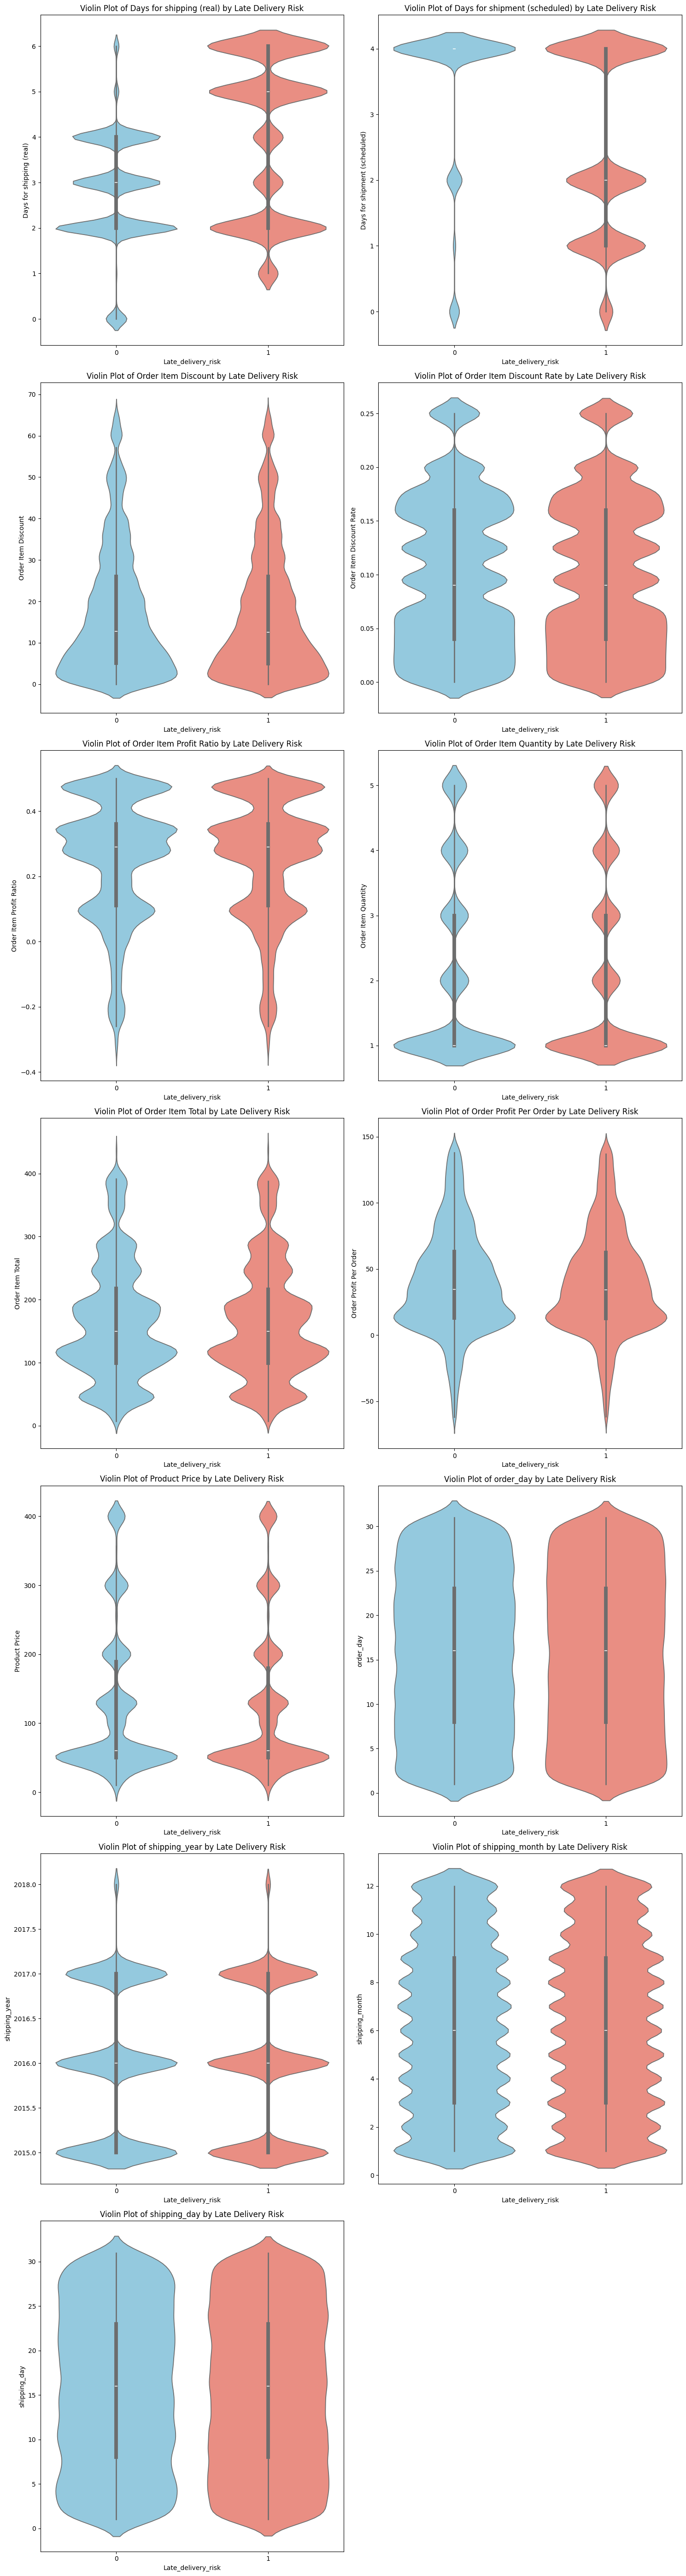

In [33]:
# Exclude the grouping column from the numerical columns to be plotted
plot_columns = [col for col in num_data_cleaned.columns if col != 'Late_delivery_risk']

# Define a custom color palette for the groups
custom_palette = {0: 'skyblue', 1: 'salmon'}

# Set the number of columns for the subplot grid (2 columns)
n_cols = 2
n_rows = (len(plot_columns) + n_cols - 1) // n_cols

# Create the subplot grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 8 * n_rows))
axes = axes.flatten()  # Flatten the axes array for easier indexing

# Loop through the numerical columns and create a violin plot with custom colors per group
for i, column in enumerate(plot_columns):
    sns.violinplot(
        data=num_data_cleaned, 
        x='Late_delivery_risk', 
        y=column,
        hue='Late_delivery_risk',        # Assign grouping variable to hue
        palette=custom_palette, 
        legend=False,                     # Disable legend to avoid duplicate info
        ax=axes[i]
    )
    axes[i].set_title(f'Violin Plot of {column} by Late Delivery Risk')

# Remove any extra subplots if there are more axes than plots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


It seems like the days of shipment scheduled and the real are showing differences in the distribution. Those orders with 1 and 2 days of shipment (scheduled) are more likely to be delayed. Also, those orders that were delivered in 5 and 6 days tend have more chances to be a late delivery.

#### Let's see if we find any difference between the orders with late delivery risk vs orders with no late delivery risk per each CATEGORICAL variable.

To do this let's plot some bar plots which give us insights about distribution per category by target.

In [34]:
# Assuming df is your DataFrame
data_cleaned['Late_delivery_risk'] = data_cleaned['Late_delivery_risk'].astype(str)
categorical_df = data_cleaned.select_dtypes(include=['object', 'category']).drop(columns=['Customer City', 'Order City', 'Order Country', 'Order State', 'Product Name', 'Category Name'], axis=1)

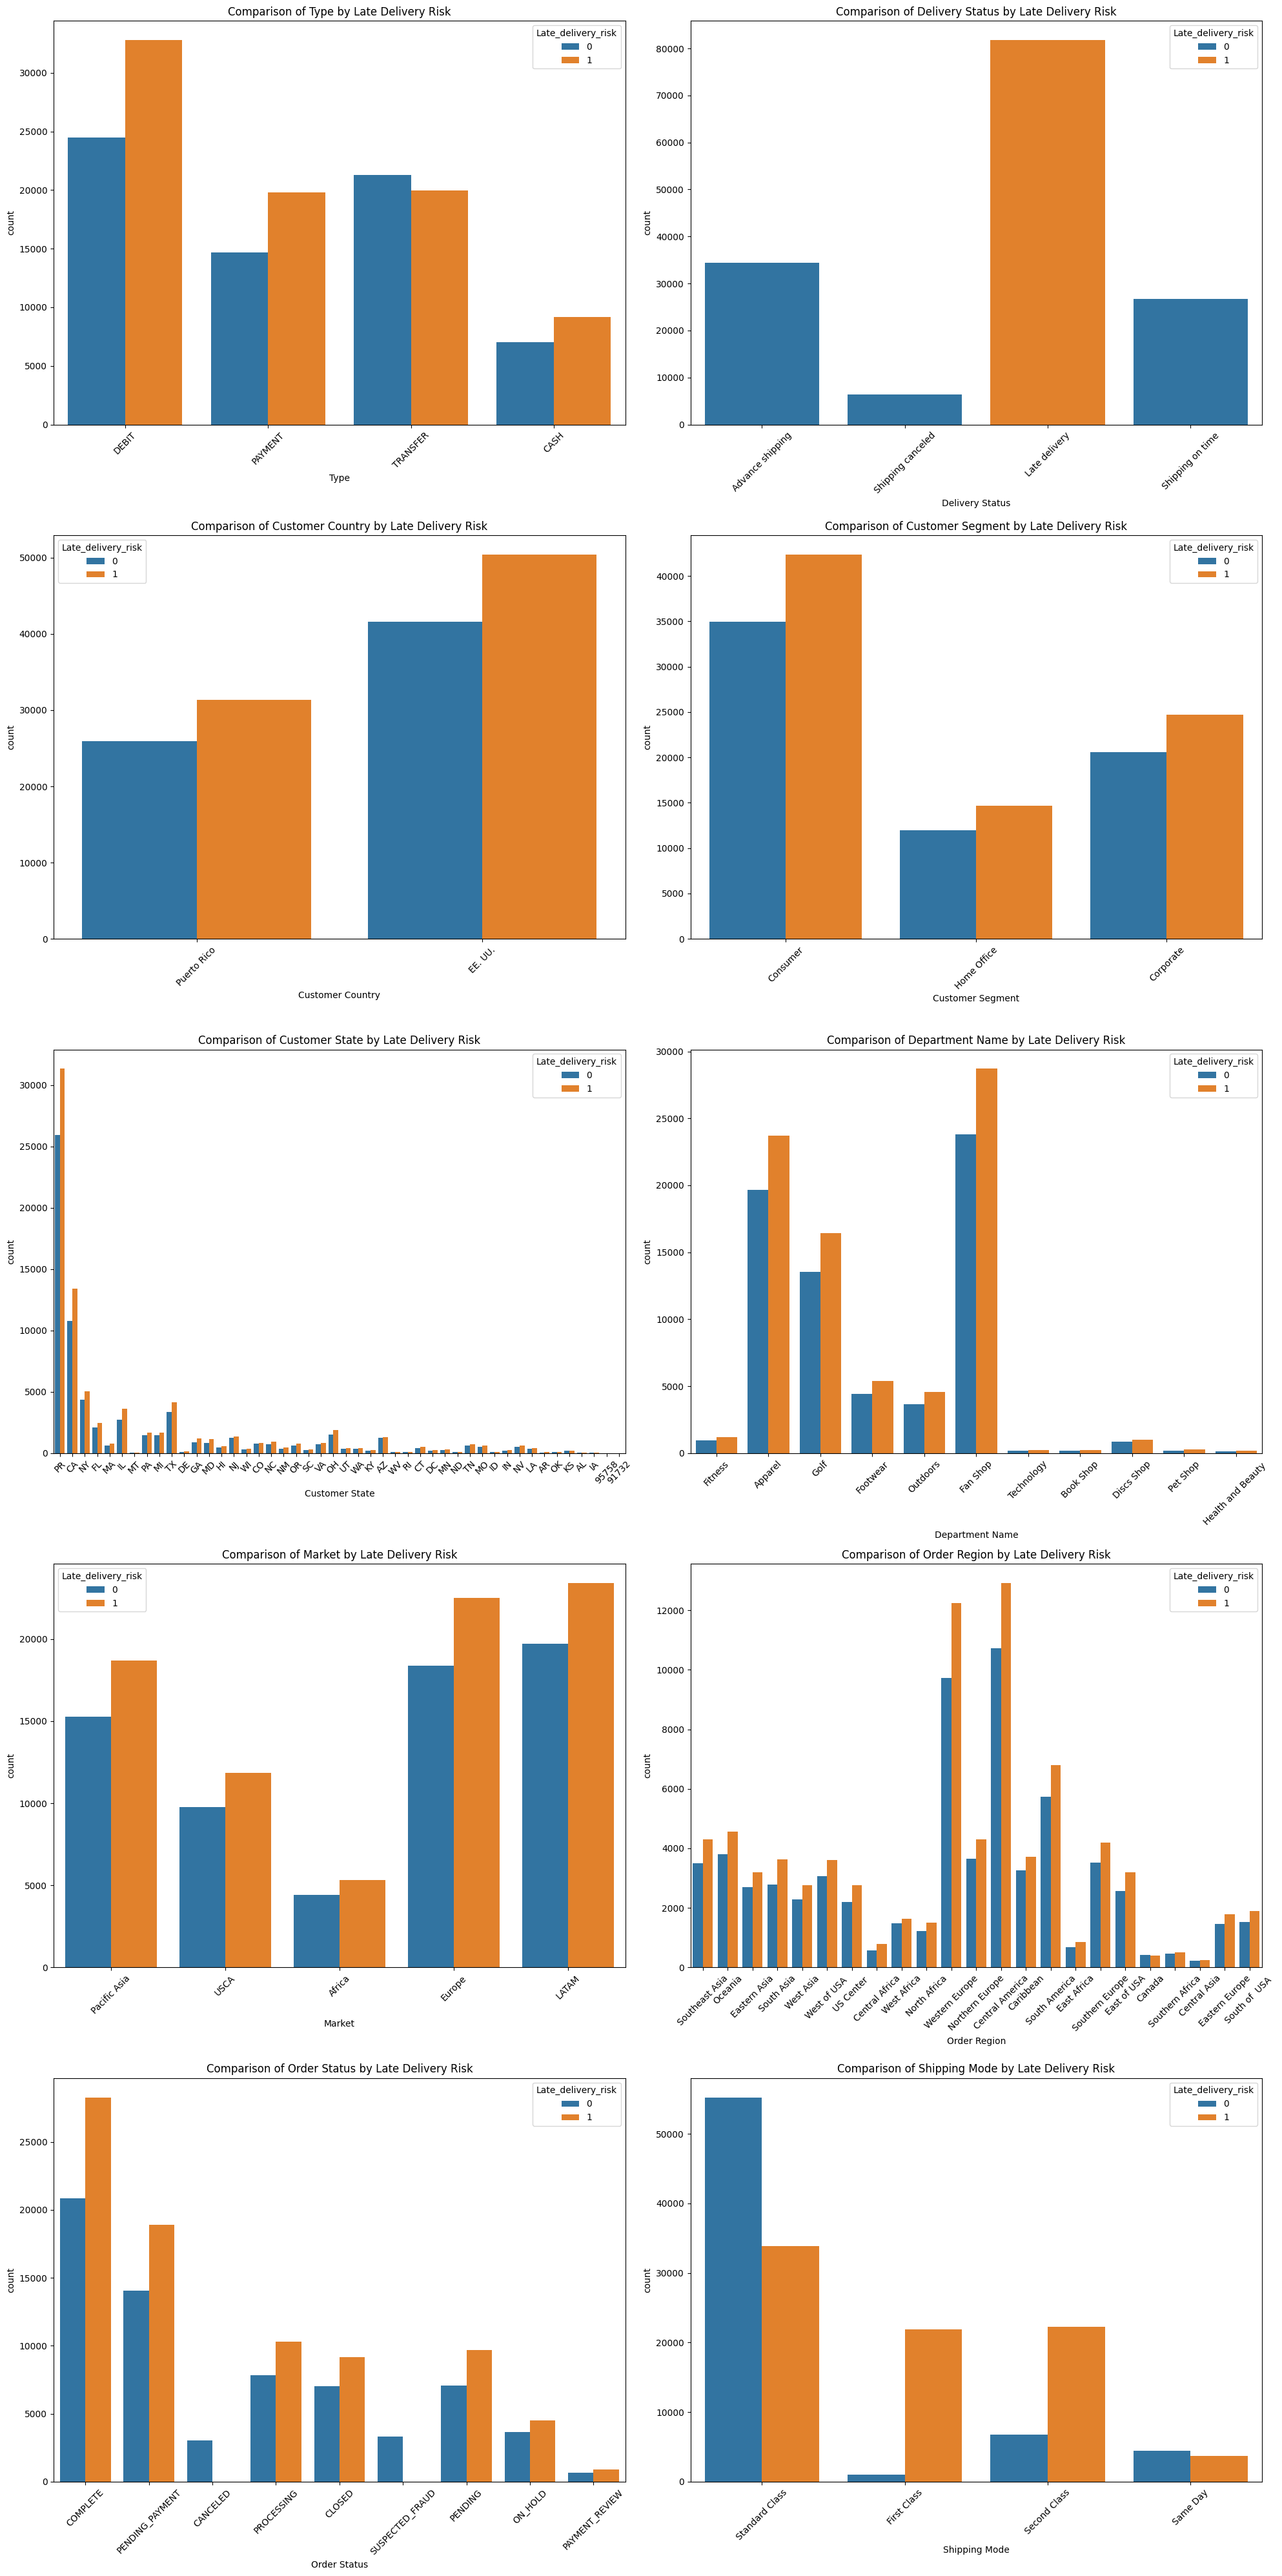

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume df is your DataFrame and it includes the 'Late_delivery_risk' column

# 1. Filter the categorical columns (dtype 'object' or 'category')
categorical_columns = categorical_df.select_dtypes(include=['object', 'category']).columns.tolist()

# 2. Remove the grouping variable if it is present in the categorical columns list
if 'Late_delivery_risk' in categorical_columns:
    categorical_columns.remove('Late_delivery_risk')

# 3. Set up the subplot grid (e.g., 2 columns)
n_cols = 2
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 8 * n_rows))
axes = axes.flatten()  # Flatten to easily iterate over axes

# 4. Loop through each categorical column and create a bar (count) plot
for i, col in enumerate(categorical_columns):
    sns.countplot(data=categorical_df, x=col, hue='Late_delivery_risk', ax=axes[i])
    axes[i].set_title(f'Comparison of {col} by Late Delivery Risk')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# 5. Remove any unused subplots if there are extra axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [36]:
# Define the grouping variable
group_var = 'Late_delivery_risk'

# Get the list of other categorical variables (exclude the grouping variable)
other_vars = [col for col in categorical_df.columns if col != group_var]

# Dictionary to store the normalized crosstab DataFrames
bivariate_tables = {}

# Loop over each remaining categorical variable and create a normalized crosstab
for var in other_vars:
    # Create a normalized crosstab where rows are Late_delivery_risk and columns are the current variable
    table = pd.crosstab(categorical_df[group_var], categorical_df[var], normalize='columns')
    # Save the table with a descriptive key
    bivariate_tables[f"{group_var} vs {var}"] = table

# Display each table as a DataFrame (in a Jupyter Notebook, display() renders nicely)
for key, table in bivariate_tables.items():
    print(f"\nBivariate Table: {key}\n")
    display(table)  # If not in Jupyter, you can use: print(table)



Bivariate Table: Late_delivery_risk vs Type



Type,CASH,DEBIT,PAYMENT,TRANSFER
Late_delivery_risk,,,,
0,0.434474,0.427597,0.425812,0.51551
1,0.565526,0.572403,0.574188,0.48449



Bivariate Table: Late_delivery_risk vs Delivery Status



Delivery Status,Advance shipping,Late delivery,Shipping canceled,Shipping on time
Late_delivery_risk,,,,
0,1.0,0.0,1.0,1.0
1,0.0,1.0,0.0,0.0



Bivariate Table: Late_delivery_risk vs Customer Country



Customer Country,EE. UU.,Puerto Rico
Late_delivery_risk,,
0,0.451807,0.452908
1,0.548193,0.547092



Bivariate Table: Late_delivery_risk vs Customer Segment



Customer Segment,Consumer,Corporate,Home Office
Late_delivery_risk,,,
0,0.4518,0.454495,0.449625
1,0.5482,0.545505,0.550375



Bivariate Table: Late_delivery_risk vs Customer State



Customer State,91732,95758,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,MI,MN,MO,MT,NC,ND,NJ,NM,NV,NY,OH,OK,OR,PA,PR,RI,SC,TN,TX,UT,VA,WA,WI,WV
Late_delivery_risk,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.5,0.5,0.454545,0.487251,0.446014,0.493159,0.454849,0.417582,0.413146,0.458785,0.434071,0.449136,0.462963,0.489796,0.431329,0.43038,0.460317,0.440098,0.467617,0.446075,0.429367,0.46242,0.436803,0.465778,0.573333,0.430962,0.421053,0.477186,0.417293,0.460154,0.461022,0.450917,0.405263,0.456241,0.462563,0.452908,0.452261,0.43088,0.452816,0.448459,0.47,0.460887,0.451697,0.477306,0.463768
1,0.0,0.5,0.5,0.545455,0.512749,0.553986,0.506841,0.545151,0.582418,0.586854,0.541215,0.565929,0.550864,0.537037,0.510204,0.568671,0.56962,0.539683,0.559902,0.532383,0.553925,0.570633,0.53758,0.563197,0.534222,0.426667,0.569038,0.578947,0.522814,0.582707,0.539846,0.538978,0.549083,0.594737,0.543759,0.537437,0.547092,0.547739,0.56912,0.547184,0.551541,0.53,0.539113,0.548303,0.522694,0.536232



Bivariate Table: Late_delivery_risk vs Department Name



Department Name,Apparel,Book Shop,Discs Shop,Fan Shop,Fitness,Footwear,Golf,Health and Beauty,Outdoors,Pet Shop,Technology
Late_delivery_risk,,,,,,,,,,,
0,0.453427,0.431319,0.458998,0.453256,0.44229,0.452478,0.451989,0.422819,0.44485,0.409611,0.461929
1,0.546573,0.568681,0.541002,0.546744,0.55771,0.547522,0.548011,0.577181,0.55515,0.590389,0.538071



Bivariate Table: Late_delivery_risk vs Market



Market,Africa,Europe,LATAM,Pacific Asia,USCA
Late_delivery_risk,,,,,
0,0.453666,0.449196,0.457248,0.449486,0.451617
1,0.546334,0.550804,0.542752,0.550514,0.548383



Bivariate Table: Late_delivery_risk vs Order Region



Order Region,Canada,Caribbean,Central Africa,Central America,Central Asia,East Africa,East of USA,Eastern Asia,Eastern Europe,North Africa,Northern Europe,Oceania,South America,South Asia,South of USA,Southeast Asia,Southern Africa,Southern Europe,US Center,West Africa,West Asia,West of USA,Western Europe
Late_delivery_risk,,,,,,,,,,,,,,,,,,,,,,,
0,0.512346,0.46792,0.418129,0.453569,0.458244,0.438722,0.446738,0.456706,0.449739,0.447552,0.459283,0.455599,0.458254,0.434021,0.443664,0.447662,0.474006,0.456304,0.442474,0.475578,0.452542,0.459354,0.442978
1,0.487654,0.53208,0.581871,0.546431,0.541756,0.561278,0.553262,0.543294,0.550261,0.552448,0.540717,0.544401,0.541746,0.565979,0.556336,0.552338,0.525994,0.543696,0.557526,0.524422,0.547458,0.540646,0.557022



Bivariate Table: Late_delivery_risk vs Order Status



Order Status,CANCELED,CLOSED,COMPLETE,ON_HOLD,PAYMENT_REVIEW,PENDING,PENDING_PAYMENT,PROCESSING,SUSPECTED_FRAUD
Late_delivery_risk,,,,,,,,,
0,1.0,0.434474,0.424583,0.445737,0.425302,0.421825,0.425836,0.431945,1.0
1,0.0,0.565526,0.575417,0.554263,0.574698,0.578175,0.574164,0.568055,0.0



Bivariate Table: Late_delivery_risk vs Shipping Mode



Shipping Mode,First Class,Same Day,Second Class,Standard Class
Late_delivery_risk,,,,
0,0.046238,0.543537,0.233059,0.62008
1,0.953762,0.456463,0.766941,0.37992


Since the City and Country variables has too many categories, making them not very visually appealing and understandable, we consider visualizing the Customer City, Order City and Country by Late Delivery Risk using a geographical visualizations.

In [37]:
import plotly.express as px

# Aggregate data (sum counts per Product Name & Risk Level)
other_variables = data_cleaned.filter(items=['Customer City', 'Order City', 'Order Country', 'Order State', 'Product Name', 'Category Name', 'Late_delivery_risk'])
df_grouped = other_variables.groupby(["Product Name", "Late_delivery_risk"]).size().reset_index(name="count")

# Reduce the number of displayed products (Top 20 by total count)
top_products = df_grouped.groupby("Product Name")["count"].sum().nlargest(20).index
df_grouped = df_grouped[df_grouped["Product Name"].isin(top_products)]

# Compute the ordering of products by total count (descending)
order = df_grouped.groupby("Product Name")["count"].sum().sort_values(ascending=False).index.tolist()

# Create interactive bar chart using Plotly Express with sorted order
import plotly.express as px

fig = px.bar(
    df_grouped,
    x="count",
    y="Product Name",
    color="Late_delivery_risk",
    title="Comparison of Product Name by Late Delivery Risk",
    labels={"count": "Order Count", "Product Name": "Product"},
    orientation="h",  # Horizontal for better readability
    barmode="group",  # Grouped bars
    color_discrete_map={0: "blue", 1: "orange"},
    category_orders={"Product Name": order}  # Set the sorted order for the y-axis
)

# Improve layout
fig.update_layout(
    xaxis_title="Count",
    yaxis_title="Product Name",
    legend_title="Late Delivery Risk",
    template="plotly_white",
    height=700
)

fig.show()


In [38]:
# Aggregate data (sum counts per Product Name & Risk Level)
df_grouped = other_variables.groupby(["Category Name", "Late_delivery_risk"]).size().reset_index(name="count")

# Reduce the number of displayed products (Top 20 by total count)
top_products = df_grouped.groupby("Category Name")["count"].sum().nlargest(20).index
df_grouped = df_grouped[df_grouped["Category Name"].isin(top_products)]

# Compute the ordering of products by total count (descending)
order = df_grouped.groupby("Category Name")["count"].sum().sort_values(ascending=False).index.tolist()

# Create interactive bar chart using Plotly Express with sorted order
import plotly.express as px

fig = px.bar(
    df_grouped,
    x="count",
    y="Category Name",
    color="Late_delivery_risk",
    title="Comparison of Category Name by Late Delivery Risk",
    labels={"count": "Order Count", "Category Name": "Product"},
    orientation="h",  # Horizontal for better readability
    barmode="group",  # Grouped bars
    color_discrete_map={0: "blue", 1: "orange"},
    category_orders={"Category Name": order}  # Set the sorted order for the y-axis
)

# Improve layout
fig.update_layout(
    xaxis_title="Count",
    yaxis_title="Category Name",
    legend_title="Late Delivery Risk",
    template="plotly_white",
    height=700
)

fig.show()

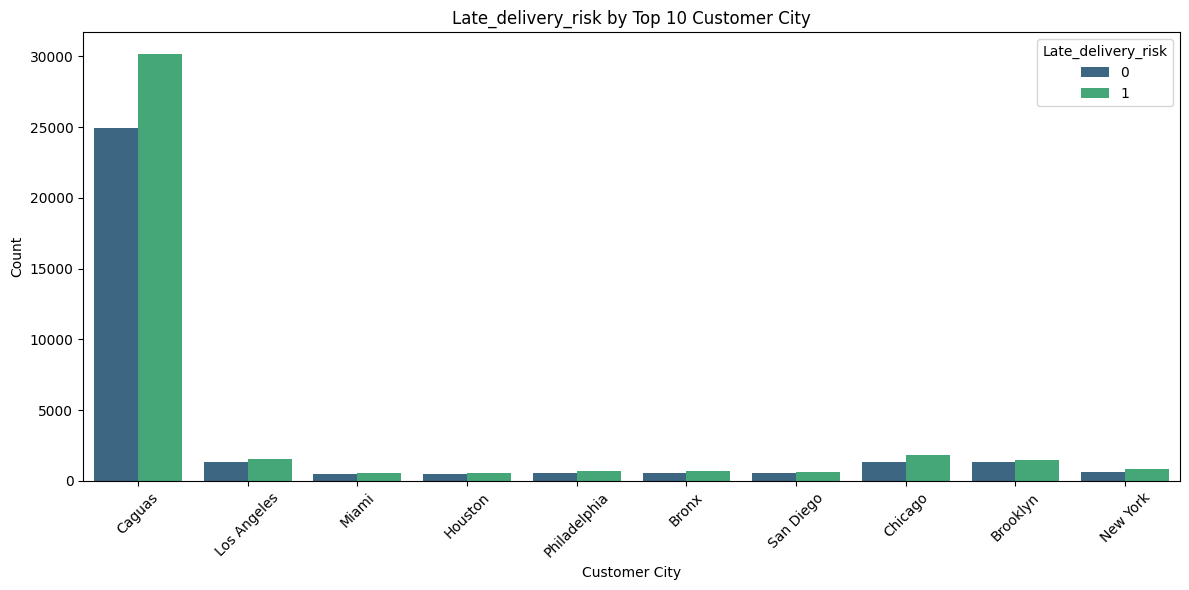

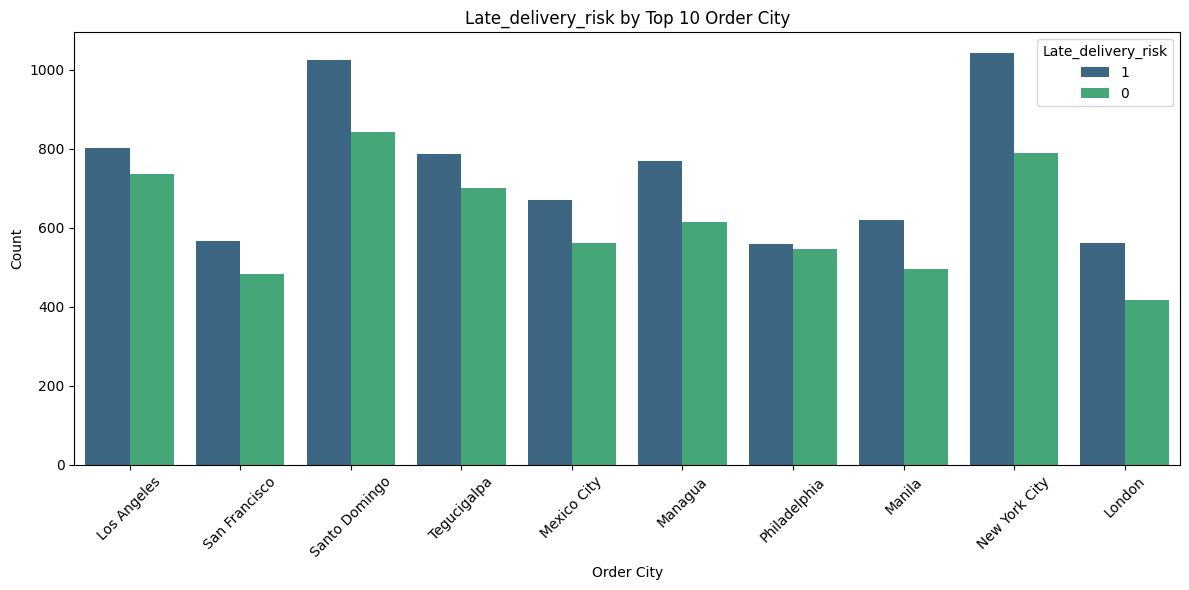

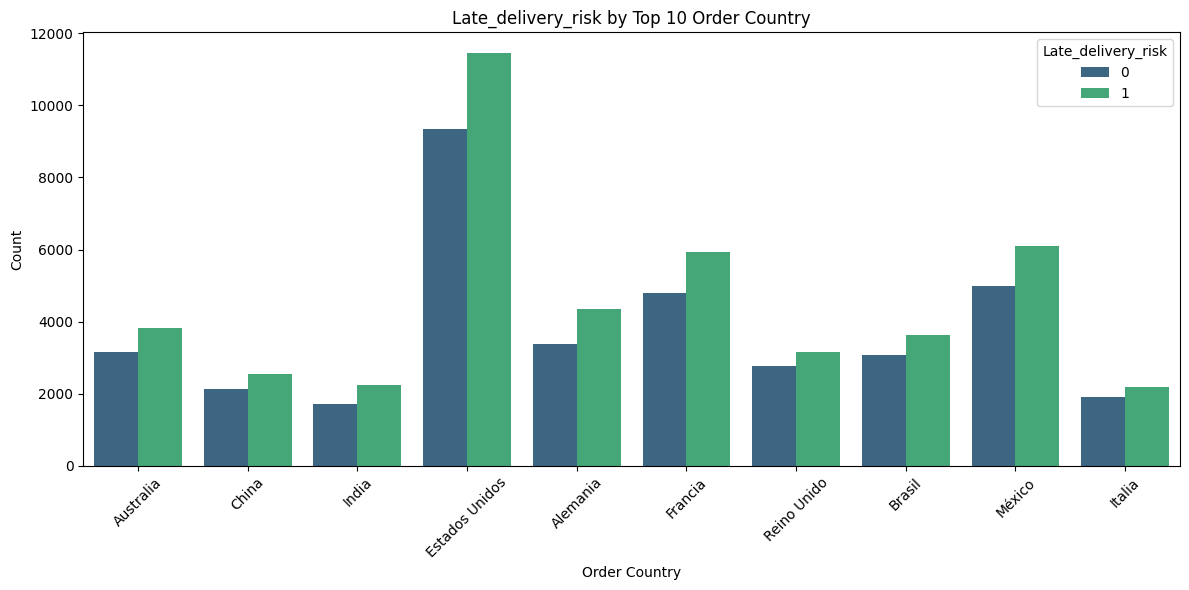

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_top_categories(df, category_col, group_col, top_n=10, figsize=(12,6), palette='viridis'):
    """
    Plots a countplot for the top N categories in `category_col` compared by `group_col`.
    
    Parameters:
      df: DataFrame containing the data.
      category_col: Column name for the categorical variable (e.g., customer_city).
      group_col: Column name for the grouping variable (e.g., Late_delivery_risk).
      top_n: Number of top categories to include.
      figsize: Figure size for the plot.
      palette: Color palette to use.
    """
    # Get the top N categories by frequency
    top_categories = df[category_col].value_counts().nlargest(top_n).index
    df_top = df[df[category_col].isin(top_categories)]
    
    plt.figure(figsize=figsize)
    sns.countplot(data=df_top, x=category_col, hue=group_col, palette=palette)
    plt.xticks(rotation=45)
    plt.title(f'{group_col} by Top {top_n} {category_col}')
    plt.xlabel(category_col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming your DataFrame is named df and has the columns: 'customer_city', 'order_city', 'order_country', and 'Late_delivery_risk'

# Plot for Customer City:
plot_top_categories(other_variables, category_col='Customer City', group_col='Late_delivery_risk')

# Plot for Order City:
plot_top_categories(other_variables, category_col='Order City', group_col='Late_delivery_risk')

# Plot for Order Country:
plot_top_categories(other_variables, category_col='Order Country', group_col='Late_delivery_risk')

# Hypothesis Testing using Chi-Square test

In [40]:
import pandas as pd
from scipy.stats import chi2_contingency

# including the grouping variable "Late_delivery_risk".

# Define the grouping variable and the other categorical variables
group_var = 'Late_delivery_risk'
other_vars = [col for col in categorical_df.columns if col != group_var]

# Dictionary to store the chi-square test results
chi2_results = {}

# Loop over each categorical variable (other than the grouping variable)
for var in other_vars:
    # Create a contingency table (observed counts)
    contingency_table = pd.crosstab(categorical_df[group_var], categorical_df[var])
    
    # Perform the chi-square test of independence
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Save results in the dictionary
    chi2_results[var] = {
        'chi2': chi2,
        'p_value': p,
        'dof': dof,
        'expected': expected,
        'observed': contingency_table
    }
    
    # Display the results
    print(f"\nChi-Square Test for {group_var} vs {var}:")
    print("Observed frequencies:")
    print(contingency_table)
    print(f"Chi-square statistic: {chi2:.3f}")
    print(f"Degrees of freedom: {dof}")
    print(f"p-value: {p:.3f}")


Chi-Square Test for Late_delivery_risk vs Type:
Observed frequencies:
Type                CASH  DEBIT  PAYMENT  TRANSFER
Late_delivery_risk                                
0                   7035  24503    14702     21272
1                   9157  32801    19825     19992
Chi-square statistic: 925.285
Degrees of freedom: 3
p-value: 0.000

Chi-Square Test for Late_delivery_risk vs Delivery Status:
Observed frequencies:
Delivery Status     Advance shipping  Late delivery  Shipping canceled  \
Late_delivery_risk                                                       
0                              34446              0               6369   
1                                  0          81775                  0   

Delivery Status     Shipping on time  
Late_delivery_risk                    
0                              26697  
1                                  0  
Chi-square statistic: 149287.000
Degrees of freedom: 3
p-value: 0.000

Chi-Square Test for Late_delivery_risk vs Customer C

In [41]:
# Define the grouping variable
group_var = 'Late_delivery_risk'

# Identify categorical columns (excluding the grouping variable)
categorical_vars = [col for col in categorical_df.columns if col != group_var and categorical_df[col].dtype == 'object']

# Store chi-square results in a DataFrame
chi2_results = []

for var in categorical_vars:
    # Create the contingency table
    contingency_table = pd.crosstab(categorical_df[group_var], categorical_df[var])

    # Perform the chi-square test
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

    # Store the results
    chi2_results.append({'Variable': var, 'Chi-Square Stat': chi2_stat, 'p-value': p_value, 'DOF': dof})

# Convert results to a DataFrame
chi2_df = pd.DataFrame(chi2_results)

# Sort results by chi-square statistic for better visualization
chi2_df = chi2_df.sort_values(by='Chi-Square Stat', ascending=False)


C:\Users\lilia\AppData\Local\Temp\ipykernel_37112\161254634.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




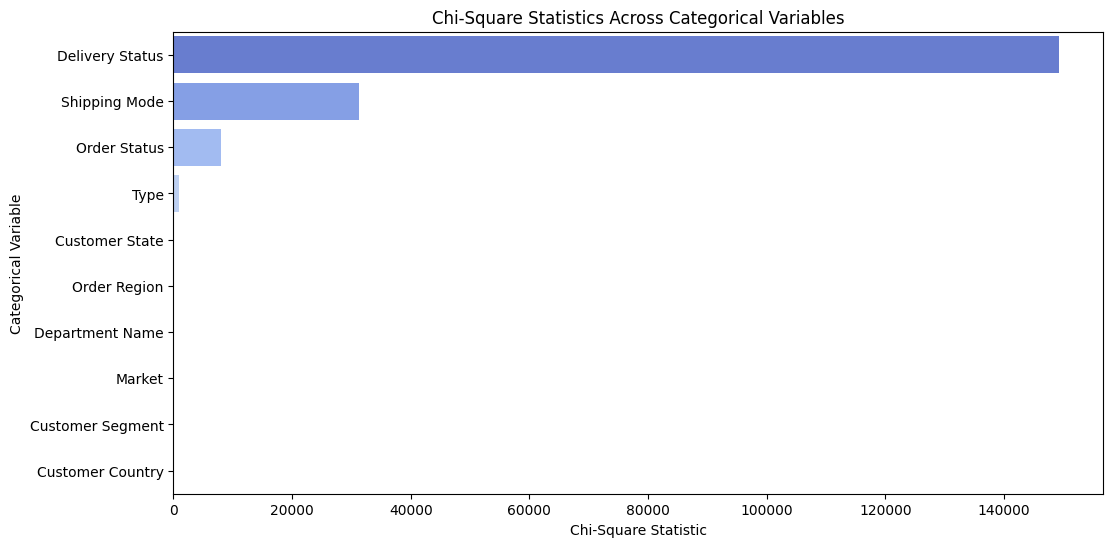

In [42]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Chi-Square Stat', y='Variable', data=chi2_df, palette='coolwarm')
plt.xlabel("Chi-Square Statistic")
plt.ylabel("Categorical Variable")
plt.title("Chi-Square Statistics Across Categorical Variables")
plt.show()

# Feature Importance (Selection)

For this task, we are using SelectFromModel to identify the importance of each feature through a specific attribute.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

# Dropping Date variable
data_cleaned = data_cleaned.drop(columns=['order_date', 'shipping_date'])

# Example: Assume df is your DataFrame and 'target' is your response variable
X = data_cleaned.drop(columns=['Late_delivery_risk'])
y = data_cleaned['Late_delivery_risk']

# Identify categorical columns by data type (or define them manually)
categorical_columns = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Create a new DataFrame with categorical columns one-hot encoded (dummified)
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Initialize a tree-based model (RandomForest in this case)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Create a DataFrame of feature importances
feature_importances = clf.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Display the feature importance dataframe
importance_df


,Feature,Importance
0,Delivery Status_Late delivery,0.365732
1,Days for shipping (real),0.240309
2,Delivery Status_Shipping on time,0.093708
3,Days for shipment (scheduled),0.086605
4,Shipping Mode_Standard Class,0.079653
...,...,...
5652,Order State_Manicalandia,0.000000
5653,Order City_Kandi,0.000000
5654,Order City_Kara,0.000000
5655,Order State_Manzini,0.000000


#### The chi-square tests shows that several variables are significantly associated with late delivery risk. For instance, payment type, delivery status, customer state, order status, order region and shipping mode all show statistically significant associations with late delivery risk (p < 0.05).

##### Hypothesis 1: Does the shipping mode (vs. first class or same day) increases the probability of late delivery? 
##### Hypothesis 2: Does the payment type affects late delivery risk because of differences in order processing time?
##### Hypothesis 3: Are orders from certain regions are causally more likely to experience late delivery due to logistical or infrastructural constraints?

#### Based on the analysis and hypothesis above we can implement Causal Inference.

# Causal Inference